# Lista 5 - Mínimos Quadrados

In [1]:
using LinearAlgebra, Plots


### - A polícia chega ao local de um assassinato às 15h, Eles imediatamente medem e registram a temperatura do corpo que é 34 graus Celsius, e inspecionam minunciosamente a área. Quando terminam a inspeção, são 16:30h. Eles medem novamente a temperatura do corpo, que caiu para 30 graus Celsius. Eles esperam mais 1 hora, e medem a temperatura de novo, que caiu para 25 graus Celsius. A temperatura na cena do crime permaneceu estável em 20 graus Celsius e a temperatura normal do corpo é 37 graus Celsius. Sabendo que a temperatura respeita a Lei de resfriamento de Newton, use mínimos quadrados não linear para descobrir que horas a pessoa foi assassinada.

=======================================================================================================================
Lei do Resfriamento de Newton: $T = (T_{0} - T_{f})e^{-kt}+T_{f}$

#### Dados:

$T_{0} = 37°$

$T_{f} = 20°$

$t_{0} =\,??\,:\,\,??$h | $T_{0} = 37°$

$t_{1} = 15:00$h | $T_{1} = 34°$

$t_{2} = 16:30$h | $T_{2} = 30°$


$t_{3} = 17:30$h | $T_{3} = 25°$

=======================================================================================================================
Linearizando:

$$T(t) = (T_{0} - T_{f})e^{-kt} + T_{f}$$
$$T(t) - T_{f} = (T_{0} - T_{f})e^{-kt}$$
$$\ln({T(t) - T_{f})} = \ln{((T_{0} - T_{f})e^{-kt})}$$
$$\ln({T(t) - T_{f})} = \ln{(T_{0} - T_{f})} + \ln{(e^{-kt})}$$
$$\ln({T(t) - T_{f})} = \ln{(T_{0} - T_{f})} - kt$$

$$\ln({T(t) - T_{f})} = \ln{(\alpha_{0})} - \alpha_{1}t,
\begin{cases}\alpha_{0} = (T_{0} - T_{f})\\ \alpha_{1} = k\end{cases}$$

$$f(t) = \ln{(T(t) - T_{f})} = \beta_{0} - \beta_{1}t$$
$$\beta_{0} = \ln{(T_{0} - T_{f})} = \ln{(\alpha)}$$
$$\beta_{1} = \alpha_{1} = k$$

=======================================================================================================================

In [17]:
function quadmin(x, y, F)
    n = length(x)
    p = length(F)
    M  = zeros(p, p)
    c = zeros(p)
    for j = 1:p
        for k = 1:p
            M[j, k] = sum(F[j](x[i]) * F[k](x[i]) for i = 1:n)
        end
        c[j] = sum(y[i] * F[j](x[i]) for i = 1:n)
    end
    β = M \ c
    h(x) = sum(F[j](x) * β[j] for j = 1:p)
    return β, h
end

quadmin (generic function with 1 method)

In [45]:
α₀ = 12
t = [90, 150]

2-element Array{Int64,1}:
  90
 150

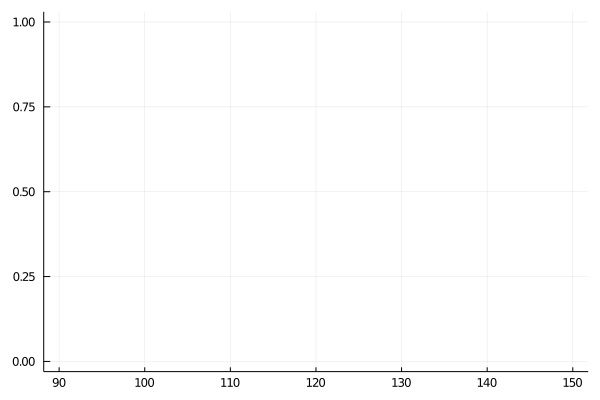

In [46]:
T = 25 .+ (α₀ * exp.(-α₁*t))
f(t) = log.(T .- 25)
β, modelo = quadmin(t, f(t), [x -> 1, x -> x])
scatter(t, f(t), leg = false)
plot!(modelo, extrema(t)..., c=:red, lw = 2)

In [44]:
β

2-element Array{Float64,1}:
 NaN
 NaN

In [39]:
l6= -log(4)/(log(3)*0.49)
25 .+ (α₀ * exp.(0.49*l6))

28.39752471894746

In [48]:
tₘ = -1/0.49*log(14/17)

0.3962367641652194

In [ ]:
# 39.6 minutos antes da polícia chegar